In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Muraa/Downloads/Climate-related_Disasters_Frequency.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             970 non-null    int64  
 1   Country              970 non-null    object 
 2   ISO2                 944 non-null    object 
 3   ISO3                 970 non-null    object 
 4   Indicator            970 non-null    object 
 5   Unit                 970 non-null    object 
 6   Source               970 non-null    object 
 7   CTS_Code             970 non-null    object 
 8   CTS_Name             970 non-null    object 
 9   CTS_Full_Descriptor  970 non-null    object 
 10  F1980                139 non-null    float64
 11  F1981                141 non-null    float64
 12  F1982                125 non-null    float64
 13  F1983                178 non-null    float64
 14  F1984                132 non-null    float64
 15  F1985                143 non-null    flo

(None,
    ObjectId                       Country ISO2 ISO3  \
 0         1  Afghanistan, Islamic Rep. of   AF  AFG   
 1         2  Afghanistan, Islamic Rep. of   AF  AFG   
 2         3  Afghanistan, Islamic Rep. of   AF  AFG   
 3         4  Afghanistan, Islamic Rep. of   AF  AFG   
 4         5  Afghanistan, Islamic Rep. of   AF  AFG   
 
                                            Indicator       Unit  \
 0  Climate related disasters frequency, Number of...  Number of   
 1  Climate related disasters frequency, Number of...  Number of   
 2  Climate related disasters frequency, Number of...  Number of   
 3  Climate related disasters frequency, Number of...  Number of   
 4  Climate related disasters frequency, Number of...  Number of   
 
                                               Source CTS_Code  \
 0  The Emergency Events Database (EM-DAT) , Centr...     ECCD   
 1  The Emergency Events Database (EM-DAT) , Centr...     ECCD   
 2  The Emergency Events Database (EM-DAT) , Ce

In [31]:
# Display first few rows of the dataset to understand its structure
df.head()


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
1,2,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,4.0,2.0,1.0,4.0,1.0,3.0,6.0,5.0,2.0,5.0
3,4,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,1.0,NaN,4.0,NaN,2.0,1.0,1.0,1.0,1.0,1.0
4,5,"Afghanistan, Islamic Rep. of",AF,AFG,"Climate related disasters frequency, Number of...",Number of,"The Emergency Events Database (EM-DAT) , Centr...",ECCD,Climate Related Disasters Frequency,"Environment, Climate Change, Climate Indicator...",...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


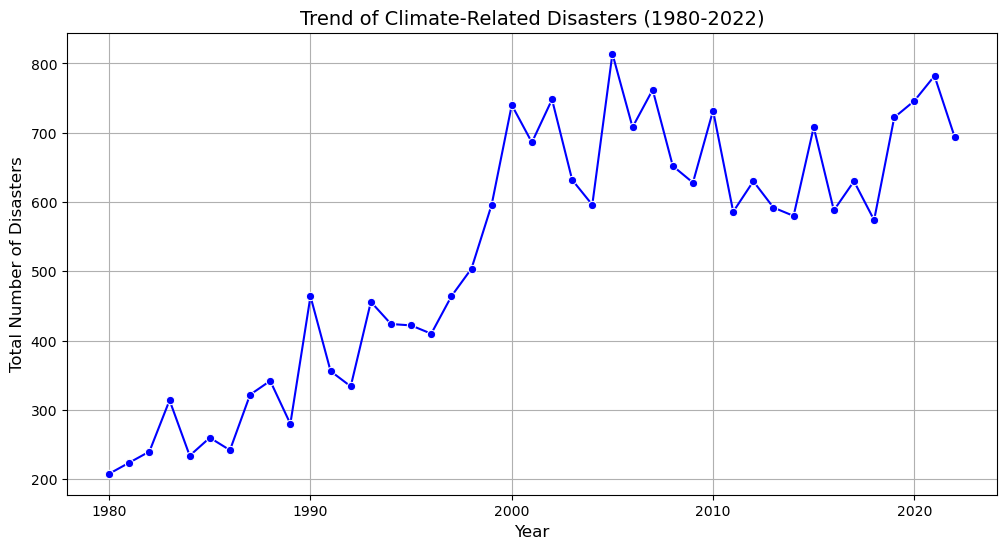

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert year columns to numeric values for analysis
year_columns = [col for col in df.columns if col.startswith('F')]
df_long = df.melt(id_vars=['Country'], value_vars=year_columns, var_name='Year', value_name='Disasters')

# Convert Year column to integer format
df_long['Year'] = df_long['Year'].str[1:].astype(int)

# Group by year to get total disasters per year
yearly_trend = df_long.groupby('Year')['Disasters'].sum().reset_index()

# Plot trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='Year', y='Disasters', marker='o', color='b')
plt.title('Trend of Climate-Related Disasters (1980-2022)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Disasters', fontsize=12)
plt.grid(True)
plt.show()


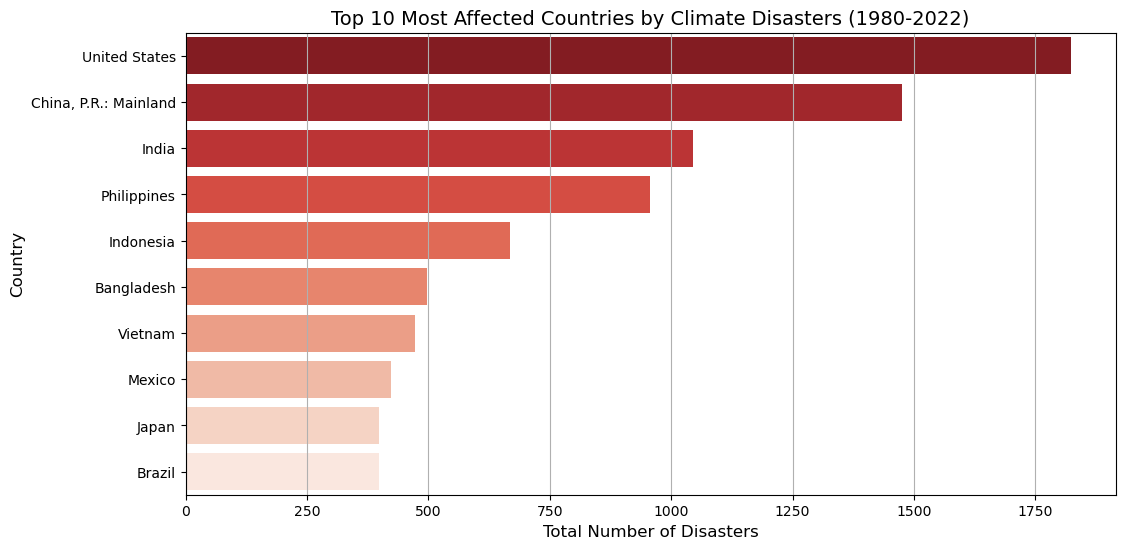

,Country,Disasters
203,United States,1824.0
42,"China, P.R.: Mainland",1476.0
87,India,1046.0
149,Philippines,956.0
88,Indonesia,668.0
14,Bangladesh,498.0
209,Vietnam,472.0
121,Mexico,424.0
96,Japan,398.0
25,Brazil,398.0


In [5]:
# Find total disasters per country
country_disasters = df_long.groupby('Country')['Disasters'].sum().reset_index()

# Top 10 most affected countries
top_countries = country_disasters.sort_values(by='Disasters', ascending=False).head(10)

# Plot top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Disasters', y='Country', palette='Reds_r')
plt.title('Top 10 Most Affected Countries by Climate Disasters (1980-2022)', fontsize=14)
plt.xlabel('Total Number of Disasters', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x')
plt.show()

# Display the top 10 countries in tabular form
top_countries


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

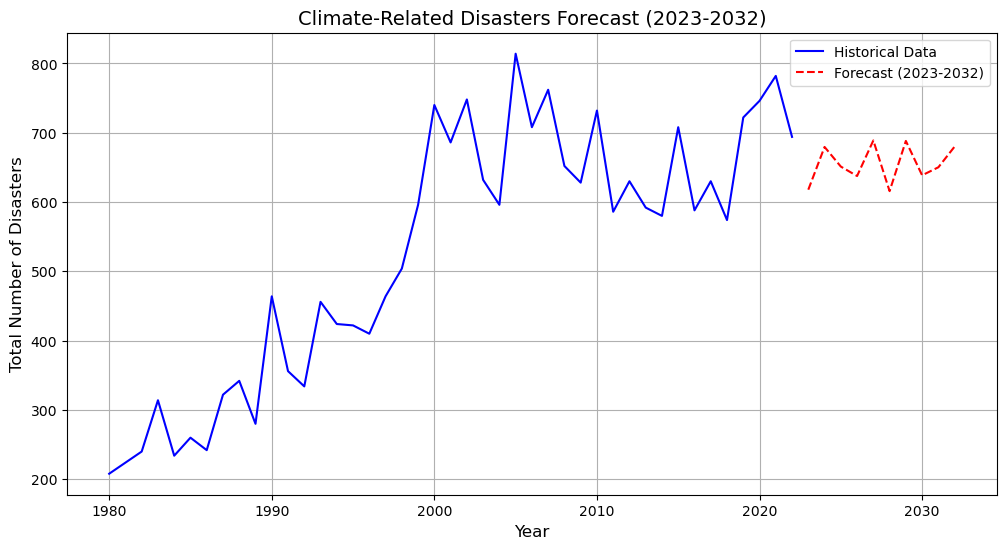

,Year,Predicted Disasters
43,2023,617.812974
44,2024,679.493145
45,2025,651.187198
46,2026,637.539378
47,2027,688.832729
48,2028,615.730926
49,2029,688.164758
50,2030,638.604091
51,2031,650.164619
52,2032,680.036195


In [11]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Prepare data for ARIMA
disaster_series = yearly_trend.set_index('Year')['Disasters']

# Fit ARIMA model (Auto ARIMA tuning would be ideal, but using a basic setup here)
model = ARIMA(disaster_series, order=(2, 1, 2))  # ARIMA(p,d,q) - tuned manually
model_fit = model.fit()

# Ensure forecasted values match the number of years
forecast_years = np.arange(2023, 2033)  # Adjusting to 10 years
forecast_values = model_fit.forecast(steps=10)  # Ensure it matches

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(disaster_series, label="Historical Data", color="blue")
plt.plot(forecast_years, forecast_values, label="Forecast (2023-2032)", linestyle="dashed", color="red")
plt.title("Climate-Related Disasters Forecast (2023-2032)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Number of Disasters", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Display forecast values in tabular form
pd.DataFrame({'Year': forecast_years, 'Predicted Disasters': forecast_values})



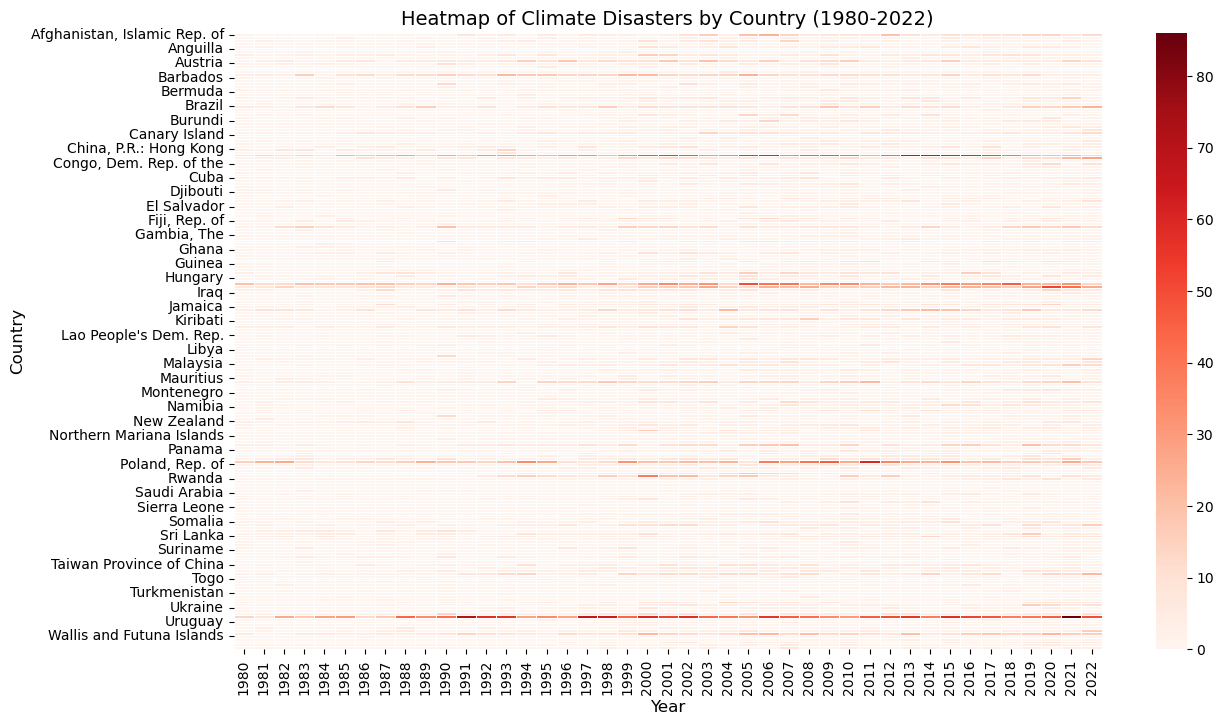

In [13]:
# Heatmap of disasters by country over the years
plt.figure(figsize=(14, 8))
heatmap_data = df_long.pivot_table(index='Country', columns='Year', values='Disasters', aggfunc='sum').fillna(0)
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, cbar=True)
plt.title("Heatmap of Climate Disasters by Country (1980-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.show()


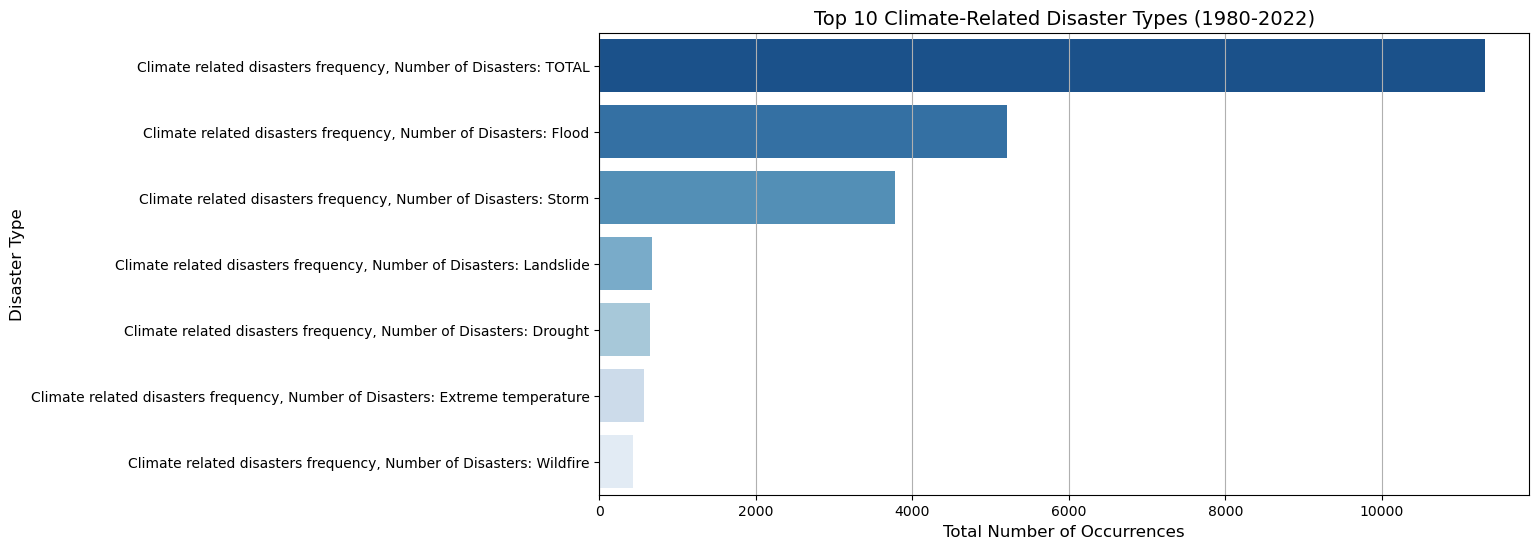

,Disaster Type,Total Occurrences
5,"Climate related disasters frequency, Number of...",11313.0
2,"Climate related disasters frequency, Number of...",5208.0
4,"Climate related disasters frequency, Number of...",3774.0
3,"Climate related disasters frequency, Number of...",674.0
0,"Climate related disasters frequency, Number of...",653.0
1,"Climate related disasters frequency, Number of...",575.0
6,"Climate related disasters frequency, Number of...",429.0


In [15]:
# Analyzing the most common disaster types
disaster_types = df.groupby('Indicator')[year_columns].sum().sum(axis=1).reset_index()
disaster_types.columns = ['Disaster Type', 'Total Occurrences']
top_disaster_types = disaster_types.sort_values(by='Total Occurrences', ascending=False).head(10)

# Plot top 10 disaster types
plt.figure(figsize=(12, 6))
sns.barplot(data=top_disaster_types, x='Total Occurrences', y='Disaster Type', palette='Blues_r')
plt.title("Top 10 Climate-Related Disaster Types (1980-2022)", fontsize=14)
plt.xlabel("Total Number of Occurrences", fontsize=12)
plt.ylabel("Disaster Type", fontsize=12)
plt.grid(axis='x')
plt.show()

# Display top 10 disaster types in a table
top_disaster_types


<Figure size 1400x700 with 0 Axes>

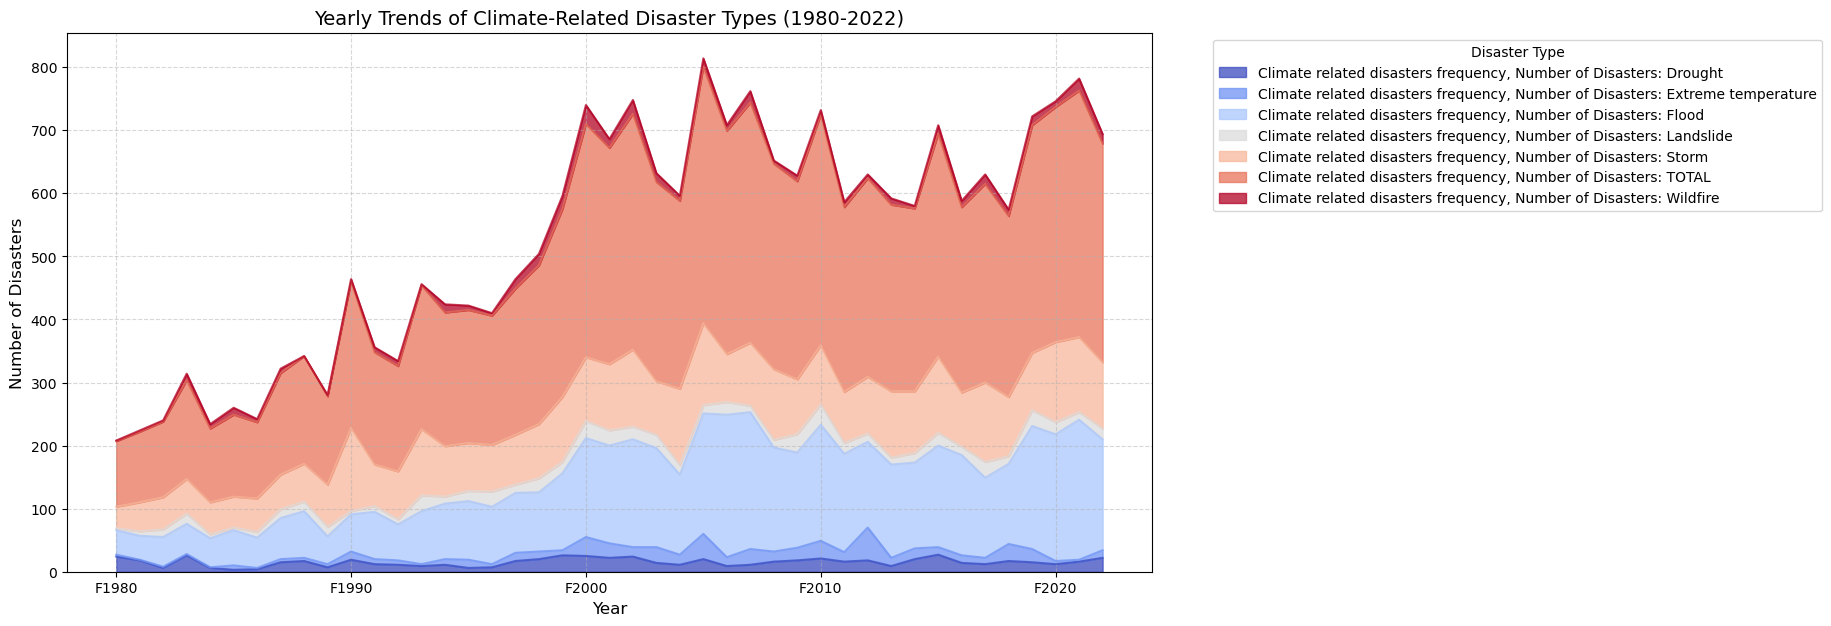

In [17]:
# Transform data for stacked area chart
df_disaster_types = df.groupby('Indicator')[year_columns].sum().T

# Plot stacked area chart
plt.figure(figsize=(14, 7))
df_disaster_types.plot(kind='area', stacked=True, colormap='coolwarm', alpha=0.75, figsize=(14, 7))
plt.title("Yearly Trends of Climate-Related Disaster Types (1980-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Disasters", fontsize=12)
plt.legend(title="Disaster Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [19]:
# Prepare country-wise yearly disaster count table
country_yearly_trend = df_long.pivot_table(index='Country', columns='Year', values='Disasters', aggfunc='sum').fillna(0)

# Display the first 10 rows for preview
country_yearly_trend.head(10)


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,...,10.0,6.0,10.0,8.0,10.0,10.0,14.0,14.0,8.0,12.0
Albania,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,...,0.0,0.0,6.0,2.0,4.0,2.0,0.0,0.0,2.0,0.0
Algeria,0.0,4.0,2.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,4.0,0.0,2.0,2.0,2.0,0.0,6.0,2.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,...,2.0,0.0,6.0,8.0,4.0,2.0,6.0,6.0,4.0,0.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
Argentina,4.0,0.0,2.0,4.0,2.0,4.0,4.0,6.0,2.0,0.0,...,4.0,8.0,8.0,4.0,8.0,10.0,8.0,4.0,4.0,2.0
"Armenia, Rep. of",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,0.0


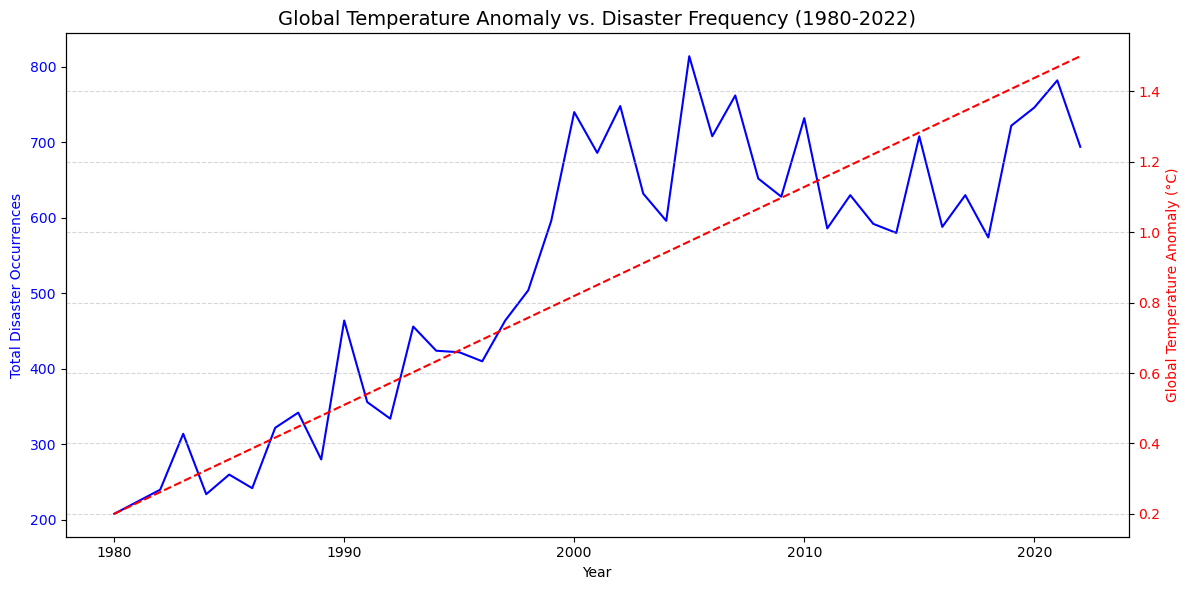

In [23]:
# Simulated Global Temperature Data (if actual data available, replace this)
years = np.arange(1980, 2023)
global_temp_anomaly = np.linspace(0.2, 1.5, len(years))  # Simulated trend of temperature anomalies

# Total disasters per year
total_disasters_per_year = df_long.groupby("Year")["Disasters"].sum()

# Plot temperature anomalies vs. disaster frequency
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Disaster Frequency
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Disaster Occurrences", color="blue")
ax1.plot(total_disasters_per_year.index, total_disasters_per_year.values, label="Total Disasters", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Plot Global Temperature Anomalies
ax2 = ax1.twinx()
ax2.set_ylabel("Global Temperature Anomaly (°C)", color="red")
ax2.plot(years, global_temp_anomaly, label="Temperature Anomaly", color="red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="red")

# Titles and Legends
plt.title("Global Temperature Anomaly vs. Disaster Frequency (1980-2022)", fontsize=14)
fig.tight_layout()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


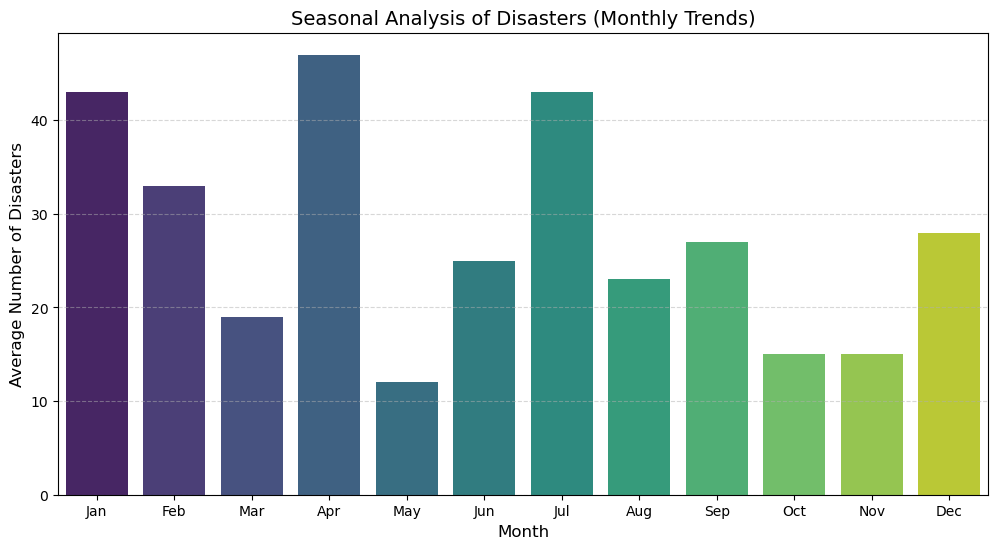

In [25]:
# Simulating monthly disaster trends (if actual data available, replace this)
np.random.seed(42)
monthly_disasters = np.random.randint(5, 50, size=(12,))
months = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

# Plot seasonal analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=months, y=monthly_disasters, palette="viridis")
plt.title("Seasonal Analysis of Disasters (Monthly Trends)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Number of Disasters", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


C:\Users\Muraa\AppData\Local\Temp\ipykernel_8924\2937837786.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  yearly_disasters.fillna(method='ffill', inplace=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


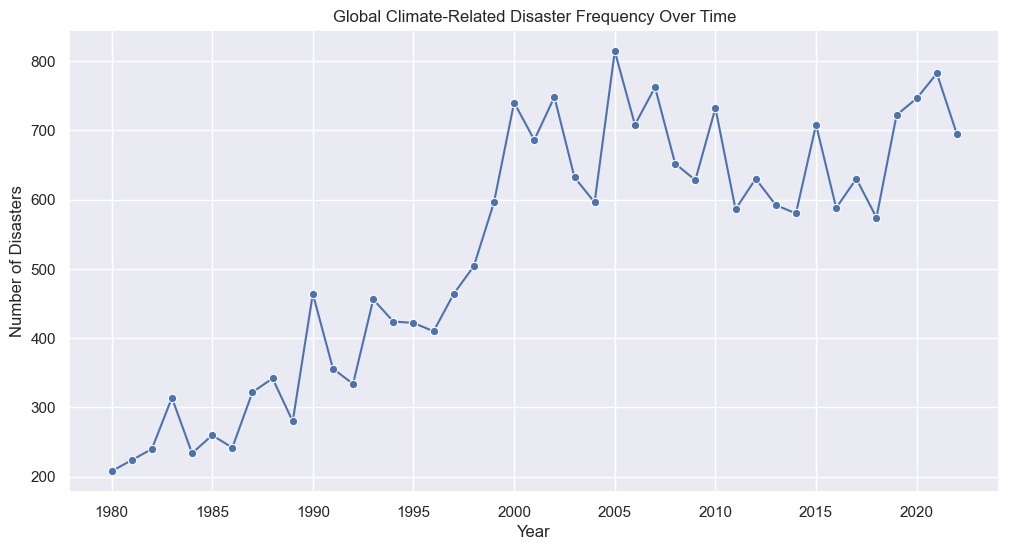

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dataset to a time series format (aggregate by year)
yearly_disasters = df.loc[:, 'F1980':'F2022'].sum()

# Handle missing values by forward filling (if needed)
yearly_disasters.fillna(method='ffill', inplace=True)

# Convert index to datetime format for time series analysis
yearly_disasters.index = pd.to_datetime(yearly_disasters.index.str[1:], format='%Y')

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_disasters.index, y=yearly_disasters.values, marker='o', linestyle='-')
plt.title("Global Climate-Related Disaster Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


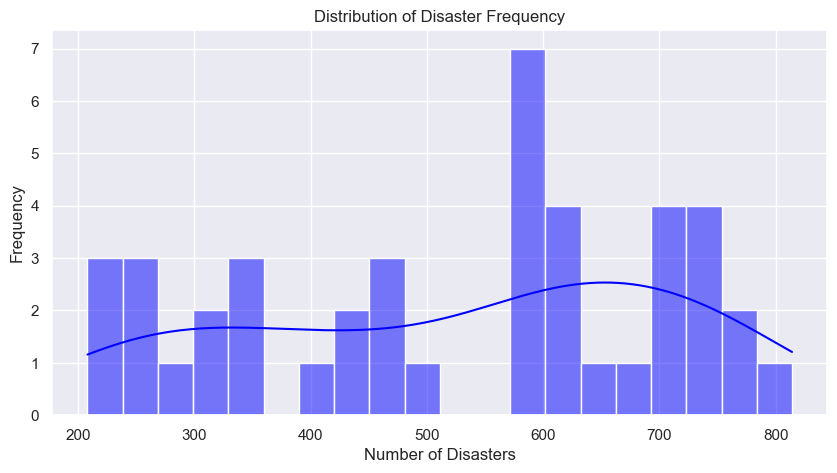

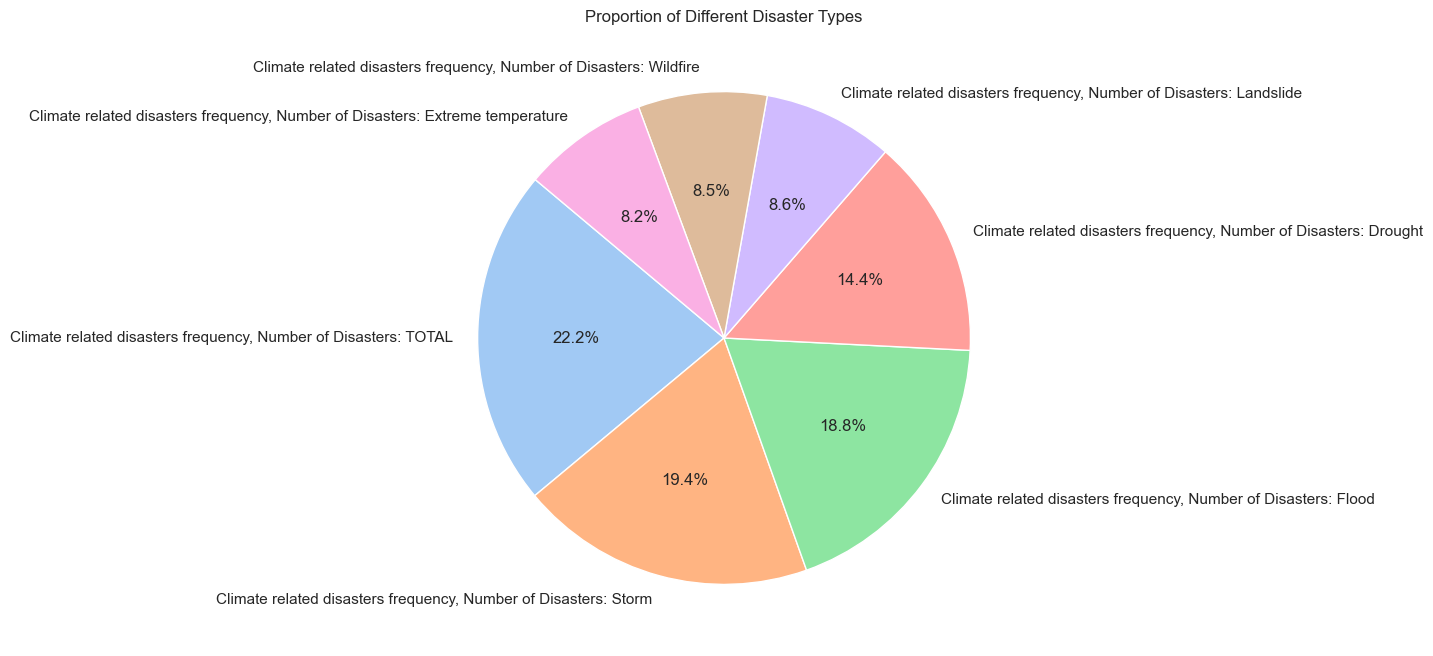

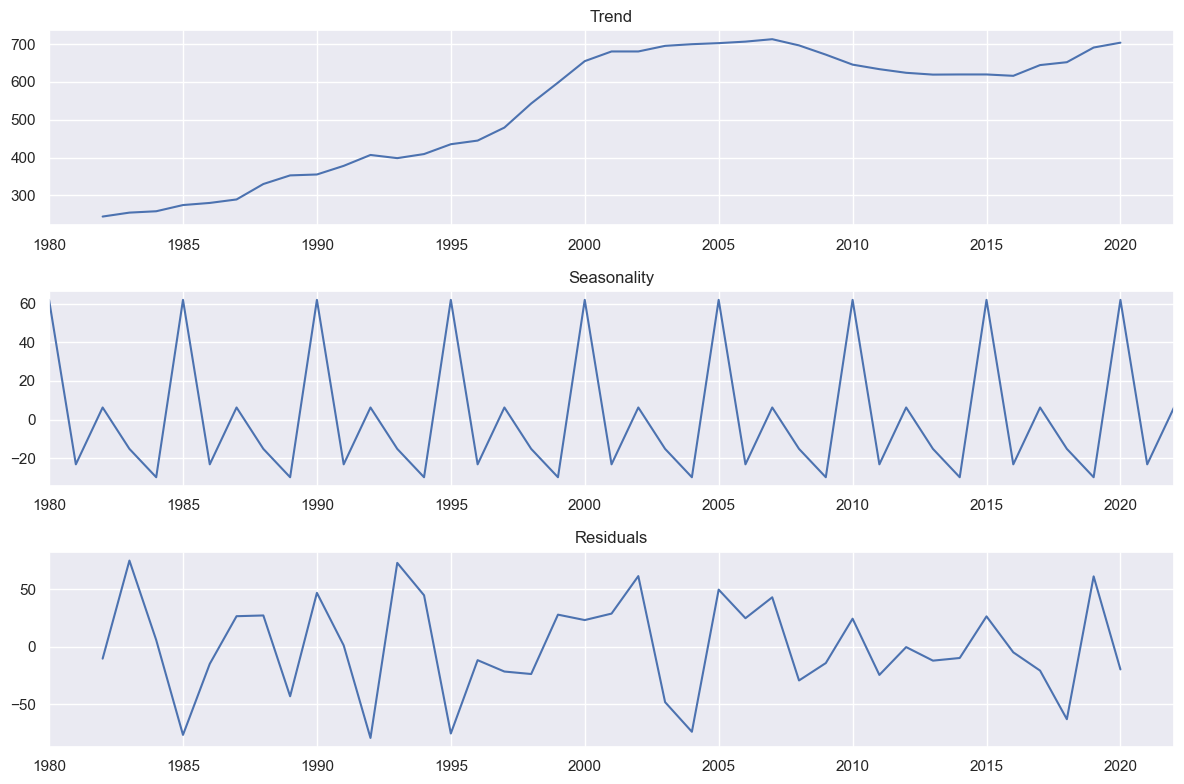

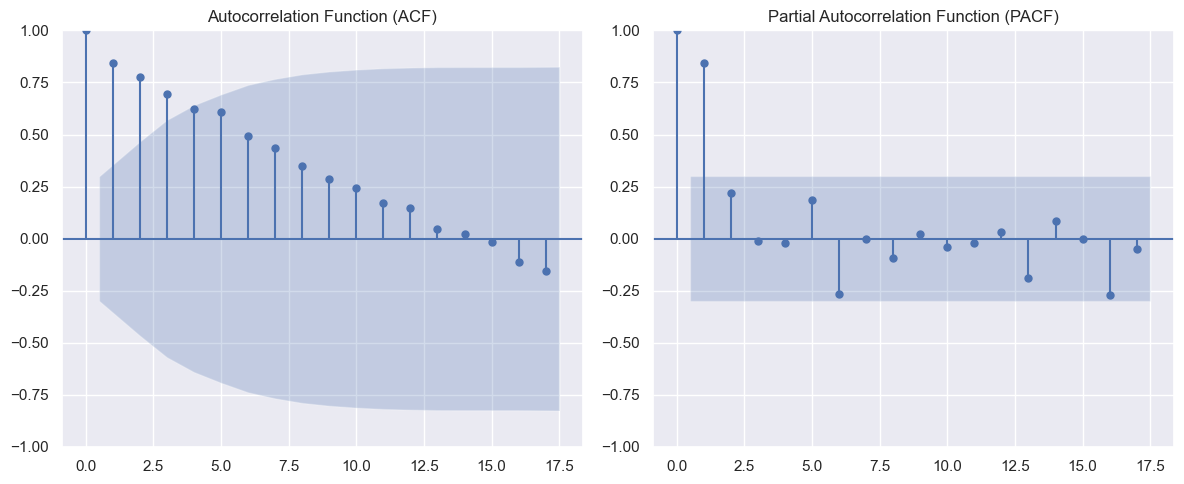

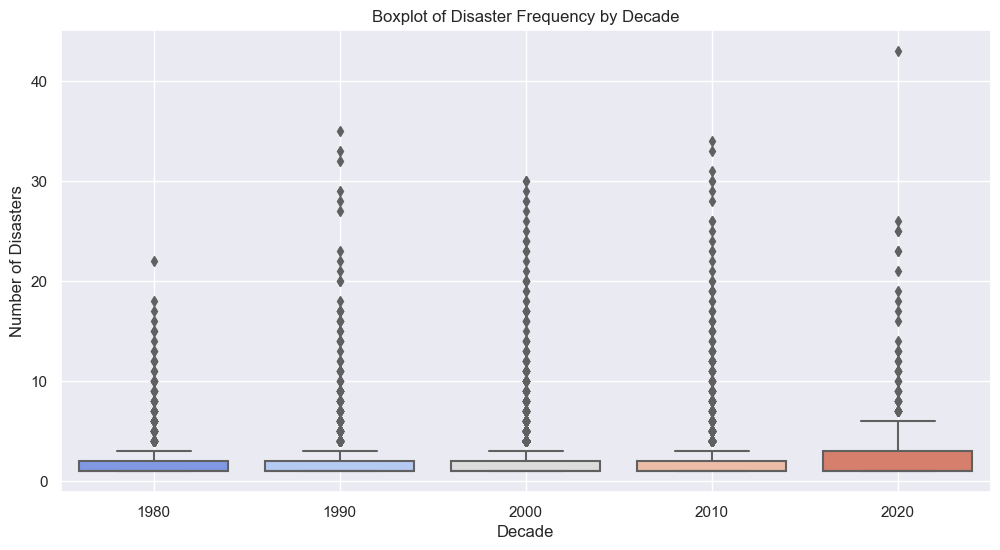

In [39]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Distribution of Disaster Frequency (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(yearly_disasters, bins=20, kde=True, color='blue')
plt.title("Distribution of Disaster Frequency")
plt.xlabel("Number of Disasters")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 2. Disaster Type Proportion (Pie Chart)
disaster_types = df['Indicator'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disaster_types, labels=disaster_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Proportion of Different Disaster Types")
plt.show()

# 3. Time-Series Decomposition
decomposition = sm.tsa.seasonal_decompose(yearly_disasters, model='additive', period=5)
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
decomposition.trend.plot(ax=ax[0], title="Trend")
decomposition.seasonal.plot(ax=ax[1], title="Seasonality")
decomposition.resid.plot(ax=ax[2], title="Residuals")
plt.tight_layout()
plt.show()

# 4. Autocorrelation and Partial Autocorrelation (ACF, PACF) Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(yearly_disasters, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")
plot_pacf(yearly_disasters, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

# 5. Boxplot of Disaster Frequency by Decade
df_melted = df.melt(id_vars=['Country'], value_vars=[f'F{year}' for year in range(1980, 2023)], var_name="Year", value_name="Disasters")
df_melted['Year'] = df_melted['Year'].str[1:].astype(int)
df_melted['Decade'] = (df_melted['Year'] // 10) * 10

plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='Disasters', data=df_melted, palette="coolwarm")
plt.title("Boxplot of Disaster Frequency by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Disasters")
plt.grid(True)
plt.show()
